Hallie's Notebook

In this notebook, I analyzed the sub-metric of park municipalities. I am measuring bestness by the number of municipal parks a neighborhood has. The more parks a neighborhood has, the more people can be physically active, reduce stress, and improve community connection. Having those three things will improve overall happiness, and the happiness of a neighborhood definitely plays a part in terms of bestness.

To read the datasheet, I first used the import pandas function as pd so that I can have all of its functions in my notebook.

In [6]:
import pandas as pd

%matplotlib inline

In [7]:
park_data = pd.read_csv("https://data.wprdc.org/datastore/dump/8425cf59-fb96-4ac0-b56a-4541ff23b276?bom=True")
park_data.head()

,_id,objectid,municipality,full_address,name,type,shape_area,shape_length
0,3796,1,BEN AVON HEIGHTS BOROUGH,2 WILSON DR,BEN AVON HEIGHTS PARK,MUNICIPAL PARK,9.164393e+04,1344.752035
1,3797,2,KILBUCK TOWNSHIP,498 CAMP HORNE RD,AVONWORTH COMMUNITY PARK,MUNICIPAL PARK,2.260629e+06,6563.867011
2,3798,3,FAWN TOWNSHIP,3054 HOWES RUN RD,FAWN TOWNSHIP COMMUNITY PARK,MUNICIPAL PARK,1.814255e+05,1962.333863
3,3799,4,HARRISON TOWNSHIP,133 RIVER AVE,FRED C SKWIRUT MEMORIAL PARK,MUNICIPAL PARK,1.535944e+05,4689.655083
4,3800,5,TARENTUM BOROUGH,318 1ST AVE,TARENTUM PARK,MUNICIPAL PARK,6.027766e+05,6740.978781


In [ ]:
I then had it read the file as park_data.

In [4]:
park_data.groupby('municipality').head()

,_id,objectid,municipality,full_address,name,type,shape_area,shape_length
0,2278,1,BEN AVON HEIGHTS,2 WILSON DR,BEN AVON HEIGHTS PARK,MUNICIPAL PARK,9.164393e+04,1344.752035
1,2279,2,KILBUCK,498 CAMP HORNE RD,AVONWORTH COMMUNITY PARK,MUNICIPAL PARK,2.260629e+06,6563.867011
2,2280,4,FAWN,3054 HOWES RUN RD,FAWN TOWNSHIP COMMUNITY PARK,MUNICIPAL PARK,1.814255e+05,1962.333863
3,2281,5,HARRISON,133 RIVER AVE,FRED C SKWIRUT MEMORIAL PARK,MUNICIPAL PARK,1.535944e+05,4689.655083
4,2282,6,TARENTUM,318 1ST AVE,TARENTUM PARK,MUNICIPAL PARK,6.027766e+05,6740.978781
...,...,...,...,...,...,...,...,...
731,3009,3468,SHARPSBURG,801 CLAY ST,CURLY PARK,MUNICIPAL PARK,1.907746e+03,181.661212
732,3010,3470,SHARPSBURG,110 13TH ST,JAMES SHARP LANDING,MUNICIPAL PARK,4.902850e+04,1219.813344
736,3014,3895,ASPINWALL,285 RIVER AVE,ASPINWALL RIVERFRONT PARK,MUNICIPAL PARK,3.539137e+05,3381.983459
739,3017,5534,OAKMONT,40 1ST ST,RIVERS EDGE OF OAKMONT GREENSPACE,MUNICIPAL PARK,1.480559e+04,508.310120


There's not much we can do with this information, so I decided to group it by municipality and see how frequently a neighborhood popped up and ranked them from highest to lowest.

In [5]:


counts = (
    park_data[park_data["municipality"].str.lower() != "pittsburgh"]["municipality"]
    .value_counts()
    .reset_index()
)

counts.columns = ["municipality", "count"]

print(counts)

                       municipality  count
0                CITY OF PITTSBURGH    169
1                     ROSS TOWNSHIP     23
2          MONROEVILLE MUNICIPALITY     22
3    UPPER SAINT CLAIR MUNICIPALITY     20
4              WEST MIFFLIN BOROUGH     18
..                              ...    ...
119            BRACKENRIDGE BOROUGH      1
120                MCDONALD BOROUGH      1
121                HAMPTON TOWNSHIP      1
122                WHITAKER BOROUGH      1
123                         HAMPTON      1

[124 rows x 2 columns]


It would be obvious that the whole city of Pittsburgh has the most municipal parks, but since we're researching which one is the best within the Pittsburgh area, I decided to filter it out and have only the top ten municipalities show up.

In [11]:
filtered = park_data[park_data["municipality"].str.upper() != "PITTSBURGH"]

In [14]:
top10 = (filtered.groupby("municipality").size().reset_index(name="park").sort_values("park", ascending=False).head(10))

In [15]:
top10.head(10)

,municipality,park
22,CITY OF PITTSBURGH,169
92,ROSS TOWNSHIP,23
68,MONROEVILLE MUNICIPALITY,22
110,UPPER SAINT CLAIR MUNICIPALITY,20
116,WEST MIFFLIN BOROUGH,18
21,CITY OF MCKEESPORT,17
81,PENN HILLS MUNICIPALITY,17
70,MOUNT LEBANON MUNICIPALITY,15
7,BETHEL PARK MUNICIPALITY,15
98,SHALER TOWNSHIP,13


In [18]:
top10 = (filtered.groupby("municipality").size().reset_index(name="park").sort_values("park", ascending=True).head(10))

In [19]:
top10.head(10)

,municipality,park
3,BALDWIN TOWNSHIP,1
6,BEN AVON HEIGHTS BOROUGH,1
9,BRACKENRIDGE BOROUGH,1
8,BLAWNOX BOROUGH,1
12,BRENTWOOD BOROUGH,1
27,DORMONT BOROUGH,1
18,CHURCHILL BOROUGH,1
16,CHALFANT BOROUGH,1
48,HAMPTON,1
49,HAMPTON TOWNSHIP,1


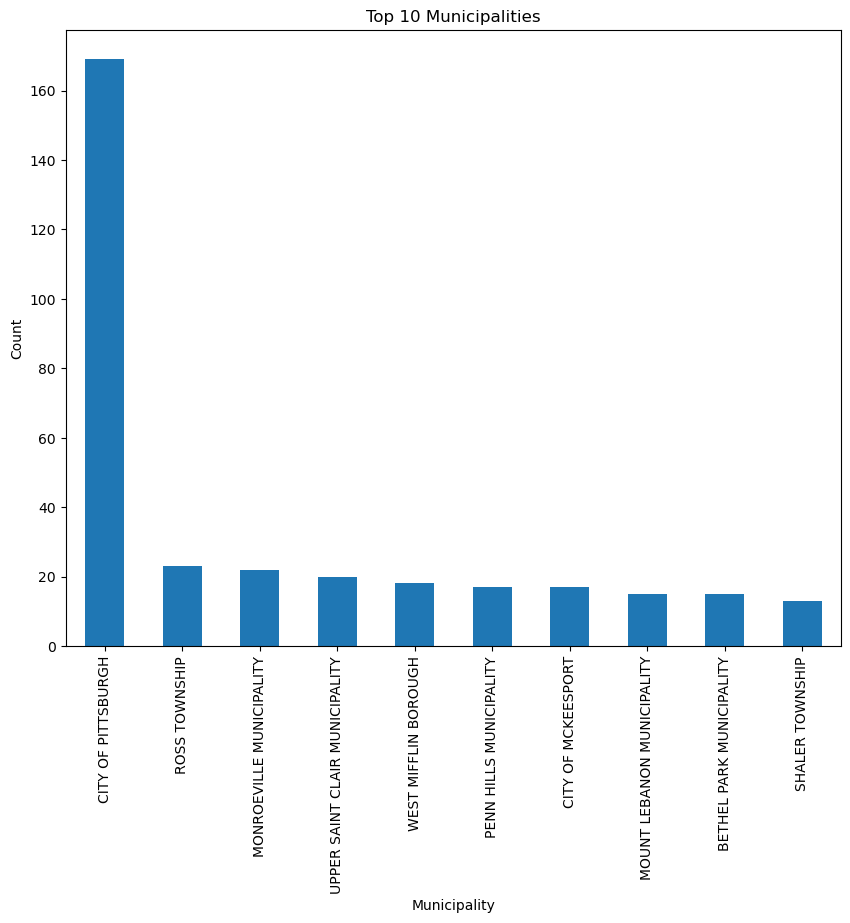

In [11]:
import matplotlib.pyplot as plt

counts = (
    park_data[park_data["municipality"].str.lower() != "pittsburgh"]["municipality"]
    .value_counts()
)

top10 = counts.head(10)

plt.figure(figsize=(10, 8))
top10.plot(kind="bar")
plt.title("Top 10 Municipalities")
plt.xlabel("Municipality")
plt.ylabel("Count")
plt.show()


Parks are like the hidden gems of Pittsburgh and show which neighborhoods have a spark of life and community engagement. They offer recreational activities and venues for gatherings that can contribute to the people's well-being. By examining how many municipal parks are in a neighborhood, you can see which neighborhood prioritizes fun and relaxation for its residents. Which means more parks, makes happier residents, which makes a neighborhood better.

Final Conclusion:

Parks are like the hidden gems of Pittsburgh and show which neighborhoods have a spark of life and community engagement. They offer recreational activities and venues for gatherings that can contribute to the people's well-being. By examining how many municipal parks are in a neighborhood, you can see which neighborhood prioritizes fun and relaxation for its residents. Which means more parks, makes happier residents, which makes a neighborhood better. It would be obvious that the whole city of Pittsburgh has the most municipal parks, but since we're researching which one is the best within the Pittsburgh area, I decided to take it out. From there, I had it count up the number of times they appeared in the dataset and had them ranked from highest to lowest, and took the top ten. 

From the dataset, Ross Township was the best neighborhood, and Baldwin Township was the loser of this set. I’ve never heard of any of these places, so I’m not too sure of how true this is.  
